# **Fraud Detection in E-Commerce Transactions**

With the rapid growth of online transactions, e-commerce platforms are increasingly vulnerable to fraudulent activities. Detecting fraud in real-time has become critical for ensuring secure transactions and protecting customers’ data and funds. This project aims to develop a machine learning model capable of distinguishing between genuine and fraudulent transactions based on various transaction features, including transaction amount, device used, and payment method, among others.

This project will involve several key stages, beginning with data collection and analysis. We will first source a relevant dataset, containing a mix of legitimate and fraudulent e-commerce transactions. Next, we’ll perform Exploratory Data Analysis (EDA) to understand the dataset’s structure, identify patterns, and detect any data quality issues. EDA will provide insights into key features and help inform our feature engineering and preprocessing steps, setting a foundation for model building.

In the following steps, we’ll preprocess the data to handle missing values, encode categorical variables, and scale numerical features as needed. After preparing the dataset, we will train multiple machine learning models, evaluate their performance, and choose the best model for fraud detection.

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [2]:
# importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Extraction

The dataset we will be using is the [Fraudulent E-Commerce Transactions dataset by shriyashjagtap](https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/data) on kaggle.
Let's load it in using pandas:

In [3]:
path = kagglehub.dataset_download("shriyashjagtap/fraudulent-e-commerce-transactions/versions/1")

csv_file_path = os.path.join(path, 'Fraudulent_E-Commerce_Transaction_Data.csv')

df = pd.read_csv(csv_file_path)

df.head()

100%|██████████| 157M/157M [00:02<00:00, 61.8MB/s]

Extracting files...


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [4]:
df.tail()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16
1472951,d1a811a2-6015-47fa-95e5-0a5282755932,637d5ed1-a4af-4234-a1d9-a3791b6f1bb6,376.44,2024-02-19 18:57:20,bank transfer,clothing,5,34,Fullermouth,desktop,107.116.208.218,Unit 0520 Box 5911\nDPO AE 75554,Unit 0520 Box 5911\nDPO AE 75554,0,274,18


## Data Exploration

Now we can take a deeper look at the dataset:

In [5]:
df.shape

(1472952, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

And also check for null values:

In [7]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


Let's look at the distributions of our data:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction Amount,1472952.0,226.768309,270.395099,10.0,68.61,151.76,296.05,12701.75
Quantity,1472952.0,3.000230,1.414736,1.0,2.00,3.00,4.00,5.00
Customer Age,1472952.0,34.512081,10.003134,-16.0,28.00,35.00,41.00,86.00
Is Fraudulent,1472952.0,0.050129,0.218212,0.0,0.00,0.00,0.00,1.00
Account Age Days,1472952.0,179.646398,106.864223,1.0,86.00,179.00,272.00,365.00
Transaction Hour,1472952.0,11.286964,6.975995,0.0,5.00,11.00,17.00,23.00


And some examples of our object datatypes:

In [9]:
df.describe(include='object')

,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Customer Location,Device Used,IP Address,Shipping Address,Billing Address
count,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952,1472952
unique,1472952,1472952,1346684,4,5,99135,3,1472651,1472948,1472949
top,d1a811a2-6015-47fa-95e5-0a5282755932,637d5ed1-a4af-4234-a1d9-a3791b6f1bb6,2024-01-27 04:00:16,credit card,health & beauty,New Michael,mobile,62.29.103.68,USCGC Holmes\nFPO AA 56289,USNS Mills\nFPO AE 77203
freq,1,1,6,368429,295367,1258,491743,2,2,2


## Data Cleaning/Preprocessing

Now we will begin cleaning and preprocessing the data for later use. This will include addressing issues we've noticed in our dataset, dropping unnecessary columns, and some other feature engineering.

First, the minimum value for the age column is -16. That's clearly incorrect, so let's look at the age feature a little closer:

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0f55fdbd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0f55fd8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0f55fda4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0f558f1060>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0f558f0370>],
 'means': []}

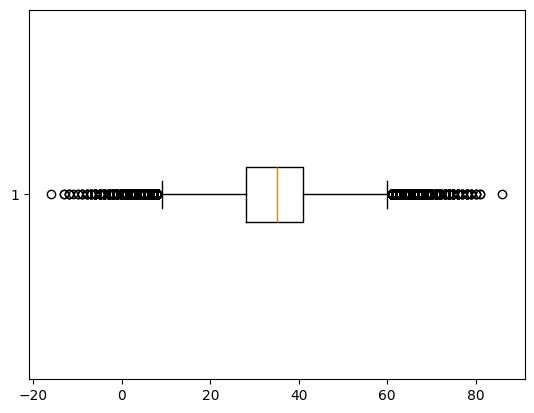

In [10]:
plt.boxplot(df['Customer Age'], vert=False)

As we can see, there are multiple outliers extending to and below age 0. These are obviously incorrect. In order to remove these incorrect values, we can calculate the lower fence (Q1 - (1.5 * IQR)) which is 8.5. So we can take any values between -8 and 8 and replace them with the mean. Any values less than -8 will be replaced with their absolute values:

In [11]:
mean_value = np.round(df['Customer Age'].mean(),0)
df['Customer Age'] = np.where(df['Customer Age'] <= -8,
                              np.abs(df['Customer Age']),
                              df['Customer Age'])

df['Customer Age'] = np.where(df['Customer Age'] < 8,
                              mean_value,
                              df['Customer Age'])

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction Amount,1472952.0,226.768309,270.395099,10.0,68.61,151.76,296.05,12701.75
Quantity,1472952.0,3.000230,1.414736,1.0,2.00,3.00,4.00,5.00
Customer Age,1472952.0,34.617785,9.843501,8.0,28.00,35.00,41.00,86.00
Is Fraudulent,1472952.0,0.050129,0.218212,0.0,0.00,0.00,0.00,1.00
Account Age Days,1472952.0,179.646398,106.864223,1.0,86.00,179.00,272.00,365.00
Transaction Hour,1472952.0,11.286964,6.975995,0.0,5.00,11.00,17.00,23.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0f58732bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0f57c5b100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0f58733d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0f57c5a800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0f57c5a410>],
 'means': []}

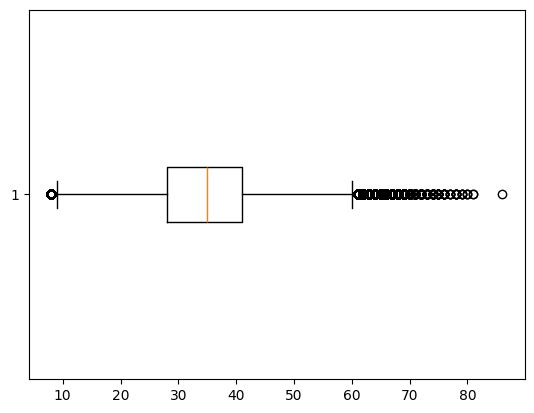

In [13]:
plt.boxplot(df['Customer Age'], vert=False)

Now we can move on to encoding some of the categorical data. We will start with the Transaction Date column. In order to turn the transaction date into categorical features we can use in our model, we will break it up into three columns : day of the week, month, and date:

In [14]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

df['Transaction Day'] = df["Transaction Date"].dt.day
df["Day of Week"] = df["Transaction Date"].dt.day_of_week
df["Transaction Month"] = df["Transaction Date"].dt.month

We can also turn the information we gain from both the "Shipping Address" and "Billing Address" columns into one feature column. We can create a binary feature titled "Addresses Match", with it being 1 if the two are the same and 0 if otherwise:

In [15]:
df["Addresses Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)

Now to get rid of the unnecessary columns and also downcast the data where possible in order to optimize memory storage:

In [16]:
df.drop(columns=["Transaction ID", "Customer ID", "Customer Location",
                     "IP Address", "Transaction Date","Shipping Address","Billing Address"], inplace=True)

intCols = df.select_dtypes(include="int").columns
floatCols = df.select_dtypes(include="float").columns

df[intCols] = df[intCols].apply(pd.to_numeric, downcast='integer')
df[floatCols] = df[floatCols].apply(pd.to_numeric, downcast='float')

In [17]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Day of Week,Transaction Month,Addresses Match
0,58.090000,bank transfer,electronics,1,17.0,tablet,0,30,5,20,1,2,1
1,389.959991,debit card,electronics,2,40.0,desktop,0,72,8,25,6,2,1
2,134.190002,PayPal,home & garden,2,22.0,tablet,0,63,3,18,0,3,1
3,226.169998,bank transfer,clothing,5,31.0,desktop,0,124,20,16,5,3,1
4,121.529999,bank transfer,clothing,2,51.0,tablet,0,158,5,15,0,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction Amount  1472952 non-null  float32
 1   Payment Method      1472952 non-null  object 
 2   Product Category    1472952 non-null  object 
 3   Quantity            1472952 non-null  int8   
 4   Customer Age        1472952 non-null  float32
 5   Device Used         1472952 non-null  object 
 6   Is Fraudulent       1472952 non-null  int8   
 7   Account Age Days    1472952 non-null  int16  
 8   Transaction Hour    1472952 non-null  int8   
 9   Transaction Day     1472952 non-null  int8   
 10  Day of Week         1472952 non-null  int8   
 11  Transaction Month   1472952 non-null  int8   
 12  Addresses Match     1472952 non-null  int8   
dtypes: float32(2), int16(1), int8(7), object(3)
memory usage: 57.6+ MB


We can see the difference in memory usage from 179.8MB down to just 57.6MB.

## Exploratory Data Analysis (EDA)

With the dataset cleaned and preprocessed, and new features engineered to enhance predictive power, we now proceed to the Exploratory Data Analysis (EDA) phase. This step aims to uncover underlying patterns, relationships, and potential anomalies within the data, providing critical insights into the factors that differentiate fraudulent transactions from legitimate ones.

Through visualization and statistical analysis, we will explore the distribution of key features, examine correlations, and assess the balance between fraud and non-fraud classes. This process will not only deepen our understanding of the dataset but also guide the selection of impactful features, setting the stage for effective model development in subsequent phases.

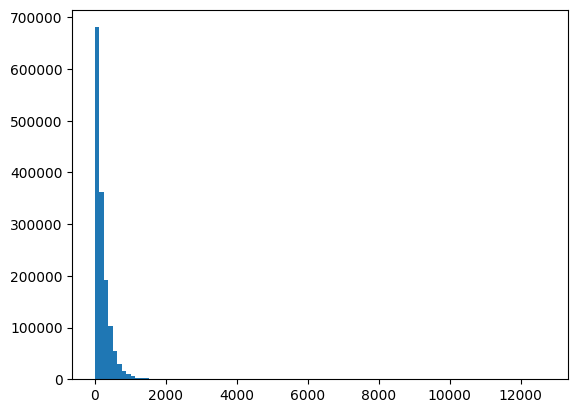

In [19]:
plt.hist(df['Transaction Amount'], bins=100)
plt.show()

Although our maximum transaction amount is 12,000+ it is obvious that our data is right skewed, with most transactions being highly concentrated between 0 and ~1000.

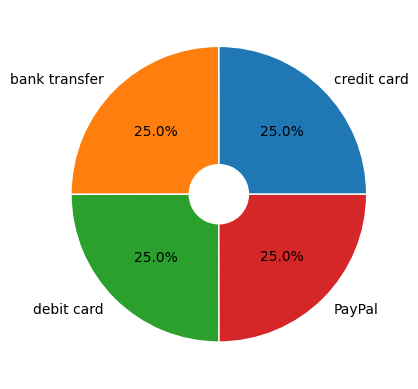

In [20]:
payments = df['Payment Method'].value_counts()

plt.pie(
    payments,
    labels=payments.index,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.8, edgecolor="w")
)

plt.show()

As we can see, the data is even in terms of what payment method was used for each transaction.

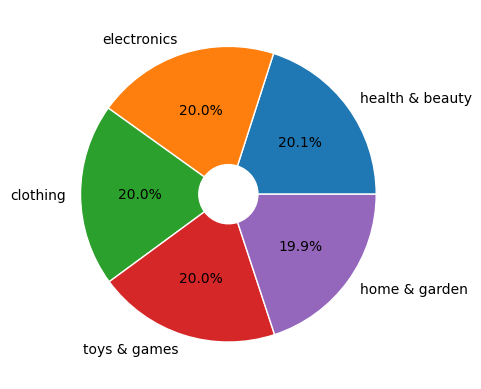

In [21]:
payments = df['Product Category'].value_counts()

plt.pie(
    payments,
    labels=payments.index,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.8, edgecolor="w")
)

plt.show()

Again, the distributions between product category purchased also seems pretty even amongst all categories.

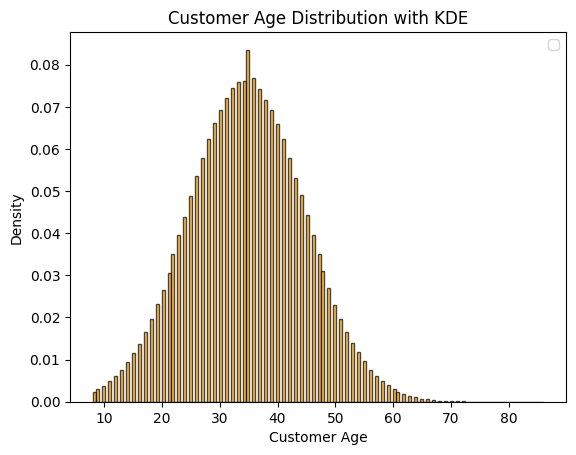

In [22]:
plt.hist(
    df['Customer Age'],
    bins=150,
    density=True,
    color='orange',
    alpha=0.7,
    edgecolor='black'
)

# Add labels and title
plt.xlabel("Customer Age")
plt.ylabel("Density")
plt.title("Customer Age Distribution with KDE")
plt.legend()

# Show the plot
plt.show()

Our customer age data is normally distributed.

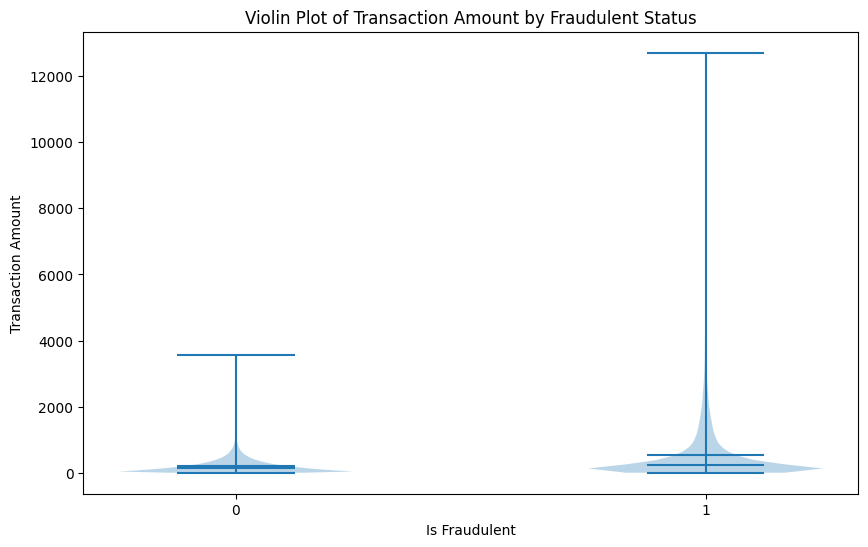

In [23]:
categories = df['Is Fraudulent'].unique()
categories.sort()
data = [df[df['Is Fraudulent'] == cat]['Transaction Amount'] for cat in categories]


plt.figure(figsize=(10, 6))
plt.violinplot(
    data,
    showmeans=True,
    showextrema=True,
    showmedians=True
)


plt.xticks(ticks=np.arange(1, len(categories) + 1), labels=categories)
plt.xlabel("Is Fraudulent")
plt.ylabel("Transaction Amount")
plt.title("Violin Plot of Transaction Amount by Fraudulent Status")


plt.show()

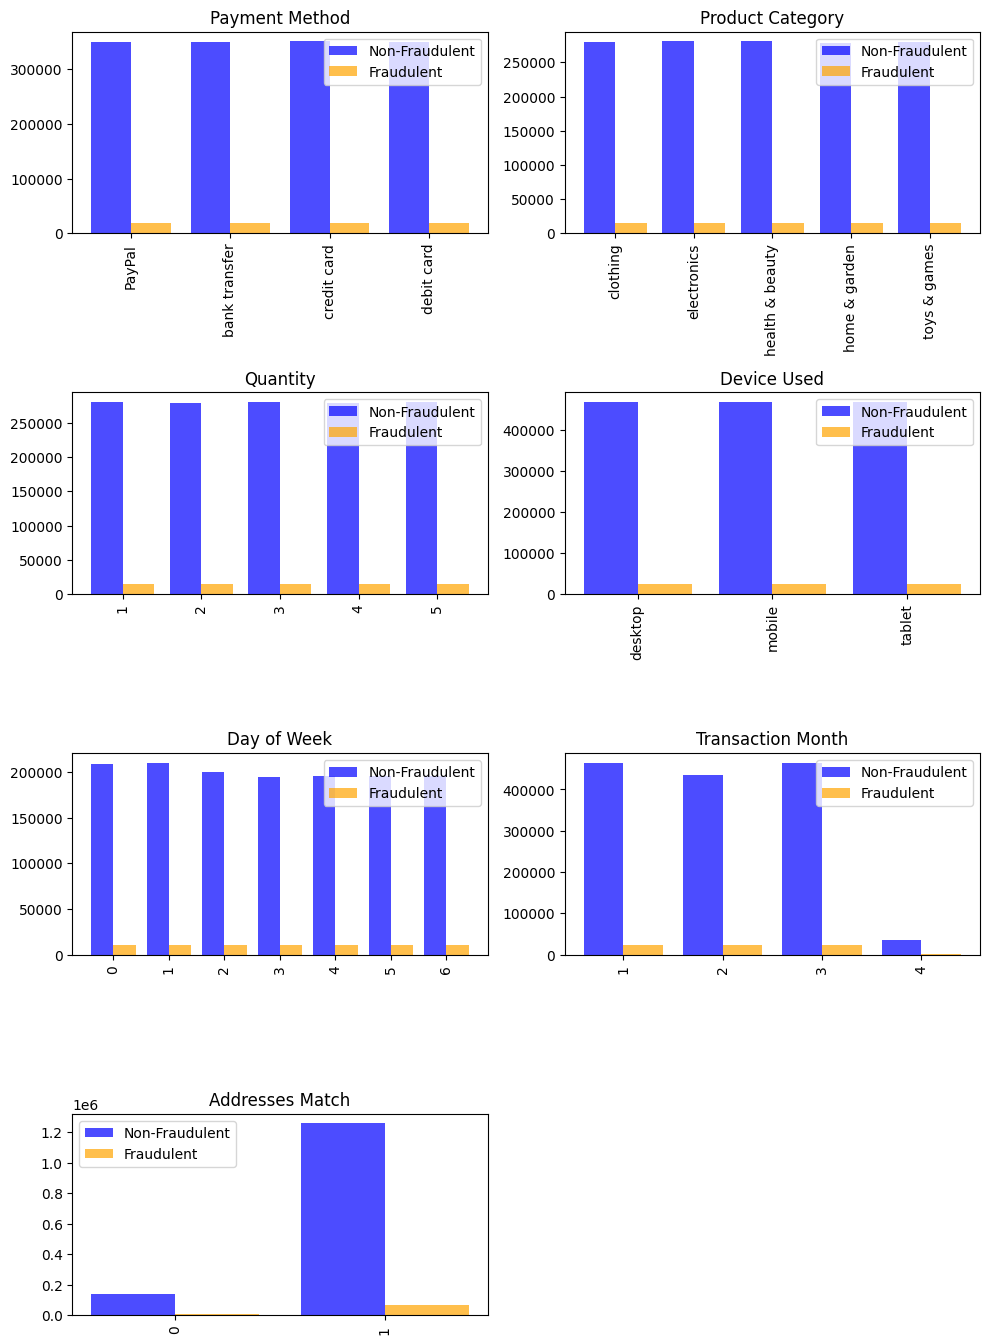

In [24]:
column = ['Payment Method', 'Product Category',
       'Quantity', 'Device Used','Day of Week',
       'Transaction Month','Addresses Match']

plt.figure(figsize=(10,35))

plot_num = 1
for col in column:
    plt.subplot(10, 2, plot_num)  # Create subplots with 10 rows and 2 columns

    # Prepare the data for the bar plot
    data = df.groupby([col, "Is Fraudulent"]).size().unstack(fill_value=0)
    categories = data.index
    fraudulent_counts = data[1] if 1 in data.columns else [0] * len(categories)  # Fraudulent counts (if exists)
    non_fraudulent_counts = data[0] if 0 in data.columns else [0] * len(categories)  # Non-fraudulent counts (if exists)

    # Plot the bars
    bar_width = 0.4
    x = range(len(categories))
    plt.bar(x, non_fraudulent_counts, width=bar_width, label='Non-Fraudulent', color='blue', alpha=0.7)
    plt.bar(
        [i + bar_width for i in x], fraudulent_counts, width=bar_width, label='Fraudulent', color='orange', alpha=0.7
    )

    # Customizations
    plt.xticks([i + bar_width / 2 for i in x], categories, rotation=90)  # Rotate x-axis labels
    plt.title(col)
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plot_num += 1

# Show the plots
plt.show()

## Model Selection & Training

With a thorough understanding of the dataset, we now move on to the model selection and training phase. This step involves testing multiple machine learning algorithms to identify the most effective model for detecting fraudulent transactions. The models we will explore include Logistic Regression, Decision Trees, Random Forests, and XGBoost. Each of these models has unique characteristics, strengths, and limitations that make them suitable for different aspects of the problem:

**Logistic Regression:**

Description: A linear model that predicts the probability of a transaction being fraudulent based on a weighted combination of features.

Pros: Simple, fast, and interpretable, making it useful as a baseline model.

Cons: May struggle with complex, non-linear relationships present in the data.

**Decision Trees:**

Description: A tree-based model that splits data into decision nodes based on feature values, ultimately classifying transactions.

Pros: Intuitive and capable of handling non-linear relationships without requiring feature scaling.

Cons: Prone to overfitting, especially on imbalanced datasets like ours.

**Random Forests:**

Description: An ensemble of decision trees that aggregates their predictions to improve accuracy and reduce overfitting.

Pros: Handles imbalanced data better and is less prone to overfitting compared to a single decision tree.

Cons: Can be slower to train and interpret due to its complexity.

**XGBoost (Extreme Gradient Boosting):**

Description: A gradient boosting framework that builds an ensemble of weak learners (typically decision trees) to optimize prediction accuracy.

Pros: Highly effective for large datasets and imbalanced problems, with robust handling of non-linear relationships.

Cons: Computationally expensive and can be harder to tune for optimal performance.


By training and evaluating these models, we aim to identify the approach that delivers the best balance of precision, recall, and overall accuracy. The performance of each model will be assessed using appropriate metrics, with a focus on minimizing false negatives to ensure reliable fraud detection.

First let's split the data into training and testing sets. We'll do a typical 80/20 split.

In [25]:
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1178361, 12)
X_test shape: (294591, 12)
y_train shape: (1178361,)
y_test shape: (294591,)


Now to encode the categorical values and normalize the others:

In [26]:
catCols = X_train.select_dtypes(include="object").columns
numCols = []
for col in X_train.columns:
    if col not in catCols  and col != 'Addresses Match':
        numCols.append(col)

transformer = ColumnTransformer(transformers=[
    ('encoding',OneHotEncoder(),catCols),
    ('scaling',StandardScaler(),numCols)
],remainder='passthrough')

And to build and test some different models. We will test not only their accuracy, but also their F1, precision, and recall scores.

In [27]:
# Creating Dictionary of Classifiers We'll Test
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [28]:
classifierNames = []
accuracy = []
for name, classifier in classifiers.items():

    model = Pipeline(steps=[
        ('transformer',transformer),
        ('classifier',classifier)
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    class_report = classification_report(y_test, y_pred)

    classifierNames.append(name)
    accuracy.append(acc_score)

    print(f"Classifier name : {name}")
    print(f"Accuracy score : {acc_score}")
    print(f"Classification report :\n{class_report}")
    print("-"*55)


Classifier name : Logistic Regression
Accuracy score : 0.9547644021711458
Classification report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.88      0.11      0.20     14762

    accuracy                           0.95    294591
   macro avg       0.92      0.56      0.59    294591
weighted avg       0.95      0.95      0.94    294591

-------------------------------------------------------
Classifier name : Decision Tree
Accuracy score : 0.915374196767722
Classification report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    279829
           1       0.21      0.26      0.23     14762

    accuracy                           0.92    294591
   macro avg       0.59      0.60      0.59    294591
weighted avg       0.92      0.92      0.92    294591

-------------------------------------------------------
Classifier name : Random Forest
Accuracy scor

In [29]:
pd.DataFrame({"Classifier name" : classifierNames, "Accuracy" : accuracy}).sort_values(by="Accuracy",ascending=False)

,Classifier name,Accuracy
3,XGBoost,0.955650
2,Random Forest,0.955372
0,Logistic Regression,0.954764
1,Decision Tree,0.915374


Based on all metrics, XGBoost performs the best on our dataset. We will proceed to hyperparameter tuning for this model in order to maximize it's performance.

In [30]:
def objective(trial):

    params = {"tree_method": "gpu_hist",  # Activate GPU acceleration
              "learning_rate": trial.suggest_float("learning_rate", 0.001, 3.0),
              "n_estimators": trial.suggest_int("n_estimators", 100, 700),
              "max_depth": trial.suggest_int("max_depth", 3, 20),
              "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
              "gamma": trial.suggest_float("gamma", 0.0, 1.0),
              "subsample": trial.suggest_float("subsample", 0.01, 1.0),
              "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
              "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
              }


    classifier = XGBClassifier(**params)

    model = Pipeline(steps=[
        ('transformer',transformer),
        ('classifier',classifier)
    ])
    model.fit(X_train, y_train)

    # Evaluate model performance
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    class_report = classification_report(y_test, preds)
    conf_matrix = confusion_matrix(y_test, preds)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=70)


best_params = study.best_params
best_trial = study.best_trial

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_trial.value)


[I 2024-11-15 23:41:00,821] A new study created in memory with name: no-name-da7fc5fc-5e33-44cb-9105-e44f48b3a61c
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might le

Accuracy: 0.9443533577061078
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    279829
           1       0.03      0.00      0.01     14762

    accuracy                           0.94    294591
   macro avg       0.49      0.50      0.49    294591
weighted avg       0.90      0.94      0.92    294591

Confusion Matrix:
[[278140   1689]
 [ 14704     58]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:41:18,876] Trial 1 finished with value: 0.9180796426231623 and parameters: {'learning_rate': 1.6369231100275503, 'n_estimators': 579, 'max_depth': 17, 'min_child_weight': 7, 'gamma': 0.9852545080656671, 'subsample': 0.1404796085252709, 'colsample_bytree': 0.686919843510215, 'reg_alpha': 0.940407584204727}. Bes

Accuracy: 0.9180796426231623
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    279829
           1       0.21      0.24      0.23     14762

    accuracy                           0.92    294591
   macro avg       0.59      0.60      0.59    294591
weighted avg       0.92      0.92      0.92    294591

Confusion Matrix:
[[266939  12890]
 [ 11243   3519]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:41:25,518] Trial 2 finished with value: 0.9524119881462774 and parameters: {'learning_rate': 0.6377790479681492, 'n_estimators': 207, 'max_depth': 12, 'min_child_weight': 8, 'gamma': 0.9553502689414155, 'subsample': 0.8624753592649692, 'colsample_bytree': 0.4023778957855236, 'reg_alpha': 0.3388500241918758}. B

Accuracy: 0.9524119881462774
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.58      0.19      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.77      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[277837   1992]
 [ 12027   2735]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/

Accuracy: 0.9498898472797879
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    279829
           1       0.00      0.00      0.00     14762

    accuracy                           0.95    294591
   macro avg       0.47      0.50      0.49    294591
weighted avg       0.90      0.95      0.93    294591

Confusion Matrix:
[[279829      0]
 [ 14762      0]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:41:36,187] Trial 4 finished with value: 0.9557488178525481 and parameters: {'learning_rate': 0.3797448636073603, 'n_estimators': 185, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.661006937182259, 'subsample': 0.9930401329949382, 'colsample_bytree': 0.7405840174828863, 'reg_alpha': 0.011825159651234873}. B

Accuracy: 0.9557488178525481
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279275    554]
 [ 12482   2280]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/

Accuracy: 0.05011015272021209
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    279829
           1       0.05      1.00      0.10     14762

    accuracy                           0.05    294591
   macro avg       0.03      0.50      0.05    294591
weighted avg       0.00      0.05      0.00    294591

Confusion Matrix:
[[     0 279829]
 [     0  14762]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:41:46,911] Trial 6 finished with value: 0.9020031161848122 and parameters: {'learning_rate': 2.4946979864904324, 'n_estimators': 516, 'max_depth': 14, 'min_child_weight': 8, 'gamma': 0.8003555272136695, 'subsample': 0.32405575249080176, 'colsample_bytree': 0.362517965654271, 'reg_alpha': 0.1382397631736506}. B

Accuracy: 0.9020031161848122
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    279829
           1       0.20      0.32      0.25     14762

    accuracy                           0.90    294591
   macro avg       0.58      0.63      0.60    294591
weighted avg       0.92      0.90      0.91    294591

Confusion Matrix:
[[260954  18875]
 [  9994   4768]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/

Accuracy: 0.9498898472797879
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    279829
           1       0.00      0.00      0.00     14762

    accuracy                           0.95    294591
   macro avg       0.47      0.50      0.49    294591
weighted avg       0.90      0.95      0.93    294591

Confusion Matrix:
[[279829      0]
 [ 14762      0]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:41:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:02,990] Trial 8 finished with value: 0.9554229423166356 and parameters: {'learning_rate': 0.09649778891242, 'n_estimators': 531, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.4144178523653653, 'subsample': 0.7464667539086282, 'colsample_bytree': 0.44620336496143664, 'reg_alpha': 0.16112478529198493}. Be

Accuracy: 0.9554229423166356
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.78      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.87      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279174    655]
 [ 12477   2285]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:23,730] Trial 9 finished with value: 0.940646523485103 and parameters: {'learning_rate': 0.35282109812135826, 'n_estimators': 676, 'max_depth': 12, 'min_child_weight': 9, 'gamma': 0.4794726284269609, 'subsample': 0.314347316300009, 'colsample_bytree': 0.6925236422792233, 'reg_alpha': 0.011407368274746865}. 

Accuracy: 0.940646523485103
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    279829
           1       0.35      0.22      0.27     14762

    accuracy                           0.94    294591
   macro avg       0.66      0.60      0.62    294591
weighted avg       0.93      0.94      0.93    294591

Confusion Matrix:
[[273853   5976]
 [ 11509   3253]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:30,262] Trial 10 finished with value: 0.9209989442990452 and parameters: {'learning_rate': 1.040688646761995, 'n_estimators': 317, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 0.6956120442338116, 'subsample': 0.014582036778447383, 'colsample_bytree': 0.9802297594338181, 'reg_alpha': 0.7008014311709243}.

Accuracy: 0.9209989442990452
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    279829
           1       0.22      0.22      0.22     14762

    accuracy                           0.92    294591
   macro avg       0.59      0.59      0.59    294591
weighted avg       0.92      0.92      0.92    294591

Confusion Matrix:
[[268041  11788]
 [ 11485   3277]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:36,572] Trial 11 finished with value: 0.9556503762844079 and parameters: {'learning_rate': 0.04654307364671689, 'n_estimators': 101, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.6254082504979285, 'subsample': 0.7388518574059852, 'colsample_bytree': 0.8421777917414413, 'reg_alpha': 0.010068650902921285}

Accuracy: 0.9556503762844079
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.82      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.89      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279342    487]
 [ 12578   2184]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:41,800] Trial 12 finished with value: 0.9514886741278586 and parameters: {'learning_rate': 0.8684100445396332, 'n_estimators': 108, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.6568349844141879, 'subsample': 0.7318110809060988, 'colsample_bytree': 0.8986915103252441, 'reg_alpha': 0.046984732020079245}.

Accuracy: 0.9514886741278586
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    279829
           1       0.55      0.18      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.75      0.59      0.62    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[277589   2240]
 [ 12051   2711]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:47,360] Trial 13 finished with value: 0.9556741380422348 and parameters: {'learning_rate': 0.17583800856682943, 'n_estimators': 102, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.6369249321013875, 'subsample': 0.987401037428467, 'colsample_bytree': 0.8342860714187623, 'reg_alpha': 0.658718767182401}. Be

Accuracy: 0.9556741380422348
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279311    518]
 [ 12540   2222]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:52,796] Trial 14 finished with value: 0.9093285266691786 and parameters: {'learning_rate': 1.2723810647817242, 'n_estimators': 349, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.7986683041215001, 'subsample': 0.998383215195822, 'colsample_bytree': 0.8107562111178864, 'reg_alpha': 0.6513794419806285}. Be

Accuracy: 0.9093285266691786
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    279829
           1       0.07      0.07      0.07     14762

    accuracy                           0.91    294591
   macro avg       0.51      0.51      0.51    294591
weighted avg       0.91      0.91      0.91    294591

Confusion Matrix:
[[266855  12974]
 [ 13737   1025]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:42:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:42:59,216] Trial 15 finished with value: 0.9549205508654371 and parameters: {'learning_rate': 0.5385172052258907, 'n_estimators': 215, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.2537528103980322, 'subsample': 0.870435524953592, 'colsample_bytree': 0.7707079530318522, 'reg_alpha': 0.650620057717929}. Bes

Accuracy: 0.9549205508654371
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.73      0.16      0.26     14762

    accuracy                           0.95    294591
   macro avg       0.84      0.58      0.62    294591
weighted avg       0.95      0.95      0.94    294591

Confusion Matrix:
[[278931    898]
 [ 12382   2380]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:05,811] Trial 16 finished with value: 0.9225536421682944 and parameters: {'learning_rate': 1.7254481880562407, 'n_estimators': 162, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.5741219474078585, 'subsample': 0.5309807026389366, 'colsample_bytree': 0.9998432451011723, 'reg_alpha': 0.7796223431284324}. 

Accuracy: 0.9225536421682944
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    279829
           1       0.24      0.25      0.24     14762

    accuracy                           0.92    294591
   macro avg       0.60      0.60      0.60    294591
weighted avg       0.92      0.92      0.92    294591

Confusion Matrix:
[[268145  11684]
 [ 11131   3631]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:16,171] Trial 17 finished with value: 0.9529788757972918 and parameters: {'learning_rate': 0.37719659178252324, 'n_estimators': 280, 'max_depth': 20, 'min_child_weight': 3, 'gamma': 0.7891916219463371, 'subsample': 0.8726956683026122, 'colsample_bytree': 0.5150692374684869, 'reg_alpha': 0.5423350546898749}.

Accuracy: 0.9529788757972918
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.60      0.18      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.78      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278094   1735]
 [ 12117   2645]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:21,739] Trial 18 finished with value: 0.9531418135652481 and parameters: {'learning_rate': 0.8782233661209984, 'n_estimators': 407, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.5269961344733524, 'subsample': 0.6585449042225788, 'colsample_bytree': 0.07343114211322466, 'reg_alpha': 0.2750032430304714}. 

Accuracy: 0.9531418135652481
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.63      0.16      0.25     14762

    accuracy                           0.95    294591
   macro avg       0.79      0.58      0.61    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278472   1357]
 [ 12447   2315]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:30,047] Trial 19 finished with value: 0.9385486997226663 and parameters: {'learning_rate': 1.2295961193507348, 'n_estimators': 160, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.896005483097305, 'subsample': 0.9139142000143841, 'colsample_bytree': 0.7457370579204898, 'reg_alpha': 0.8156319908086995}. B

Accuracy: 0.9385486997226663
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    279829
           1       0.33      0.22      0.27     14762

    accuracy                           0.94    294591
   macro avg       0.65      0.60      0.62    294591
weighted avg       0.93      0.94      0.93    294591

Confusion Matrix:
[[273218   6611]
 [ 11492   3270]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:36,427] Trial 20 finished with value: 0.9554772549059544 and parameters: {'learning_rate': 0.23449758443039465, 'n_estimators': 230, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.7241019836658542, 'subsample': 0.4368948498535541, 'colsample_bytree': 0.901497709978801, 'reg_alpha': 0.5398247461662671}. B

Accuracy: 0.9554772549059544
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279270    559]
 [ 12557   2205]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:42,285] Trial 21 finished with value: 0.9547847693921403 and parameters: {'learning_rate': 0.011694265450881515, 'n_estimators': 105, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.5822690364774389, 'subsample': 0.7960233959422449, 'colsample_bytree': 0.8417348567150692, 'reg_alpha': 0.08219044137776713}

Accuracy: 0.9547847693921403
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    279829
           1       0.93      0.11      0.19     14762

    accuracy                           0.95    294591
   macro avg       0.94      0.55      0.58    294591
weighted avg       0.95      0.95      0.94    294591

Confusion Matrix:
[[279715    114]
 [ 13206   1556]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:47,129] Trial 22 finished with value: 0.9553720242641492 and parameters: {'learning_rate': 0.5764437115393325, 'n_estimators': 122, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.6189652127591486, 'subsample': 0.9363607236472264, 'colsample_bytree': 0.8801426519057146, 'reg_alpha': 0.20907971672092057}. 

Accuracy: 0.9553720242641492
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.77      0.16      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.86      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279128    701]
 [ 12446   2316]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:53,731] Trial 23 finished with value: 0.9542314598884555 and parameters: {'learning_rate': 0.008496698893923078, 'n_estimators': 171, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.36524029765537686, 'subsample': 0.6431609829749192, 'colsample_bytree': 0.5886004406892096, 'reg_alpha': 0.28204953654664167

Accuracy: 0.9542314598884555
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    279829
           1       0.95      0.09      0.17     14762

    accuracy                           0.95    294591
   macro avg       0.95      0.55      0.57    294591
weighted avg       0.95      0.95      0.94    294591

Confusion Matrix:
[[279756     73]
 [ 13410   1352]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:43:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:43:58,370] Trial 24 finished with value: 0.9553448679694899 and parameters: {'learning_rate': 0.7114991023210195, 'n_estimators': 105, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.7276749768324102, 'subsample': 0.7996690409473094, 'colsample_bytree': 0.7180172141183512, 'reg_alpha': 0.014874654195100232}.

Accuracy: 0.9553448679694899
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.77      0.16      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.86      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279136    693]
 [ 12462   2300]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:07,054] Trial 25 finished with value: 0.9535118180799821 and parameters: {'learning_rate': 0.2915469133735274, 'n_estimators': 251, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.8722193787325712, 'subsample': 0.6945051184741765, 'colsample_bytree': 0.9282458983653383, 'reg_alpha': 0.4020610725483453}. B

Accuracy: 0.9535118180799821
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.63      0.17      0.27     14762

    accuracy                           0.95    294591
   macro avg       0.79      0.58      0.62    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278335   1494]
 [ 12201   2561]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:12,829] Trial 26 finished with value: 0.9557012943368942 and parameters: {'learning_rate': 0.4077789577884035, 'n_estimators': 335, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.5063757149357766, 'subsample': 0.802598820937681, 'colsample_bytree': 0.8253791399672856, 'reg_alpha': 0.0894853306492283}. Be

Accuracy: 0.9557012943368942
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279270    559]
 [ 12491   2271]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:19,600] Trial 27 finished with value: 0.9552124810330255 and parameters: {'learning_rate': 1.0646553471261548, 'n_estimators': 336, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 0.49662221779662097, 'subsample': 0.9387409567795408, 'colsample_bytree': 0.6435444884589531, 'reg_alpha': 0.10494670675952966}.

Accuracy: 0.9552124810330255
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.79      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.87      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279239    590]
 [ 12604   2158]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:26,232] Trial 28 finished with value: 0.955602852768754 and parameters: {'learning_rate': 0.45794089619136996, 'n_estimators': 442, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 0.20206788139199605, 'subsample': 0.8257762314247876, 'colsample_bytree': 0.765712583233654, 'reg_alpha': 0.23392887939213278}. 

Accuracy: 0.955602852768754
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.79      0.16      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.87      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279212    617]
 [ 12462   2300]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:32,319] Trial 29 finished with value: 0.9417022244399863 and parameters: {'learning_rate': 2.001763661147103, 'n_estimators': 306, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 0.5407337289283387, 'subsample': 0.9549941606390588, 'colsample_bytree': 0.520878017268448, 'reg_alpha': 0.4892696379433668}. Be

Accuracy: 0.9417022244399863
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    279829
           1       0.02      0.00      0.01     14762

    accuracy                           0.94    294591
   macro avg       0.49      0.50      0.49    294591
weighted avg       0.90      0.94      0.92    294591

Confusion Matrix:
[[277360   2469]
 [ 14705     57]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:38,207] Trial 30 finished with value: 0.9546388043083461 and parameters: {'learning_rate': 0.8095922690684147, 'n_estimators': 368, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.4343102728000783, 'subsample': 0.9968858158902071, 'colsample_bytree': 0.8063985366909663, 'reg_alpha': 0.8717125023009463}. B

Accuracy: 0.9546388043083461
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.70      0.17      0.27     14762

    accuracy                           0.95    294591
   macro avg       0.83      0.58      0.62    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278792   1037]
 [ 12326   2436]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:45,338] Trial 31 finished with value: 0.9554942275901165 and parameters: {'learning_rate': 0.1843118142856848, 'n_estimators': 196, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.619432963983162, 'subsample': 0.6140671197236703, 'colsample_bytree': 0.8466886106610377, 'reg_alpha': 0.08053842875584631}. B

Accuracy: 0.9554942275901165
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.78      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.87      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279201    628]
 [ 12483   2279]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:50,243] Trial 32 finished with value: 0.9557284506315535 and parameters: {'learning_rate': 0.2210298317929714, 'n_estimators': 142, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.6563176540681112, 'subsample': 0.7506441453253092, 'colsample_bytree': 0.9549673947745104, 'reg_alpha': 0.008400354725770724}.

Accuracy: 0.9557284506315535
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279304    525]
 [ 12517   2245]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:44:55,798] Trial 33 finished with value: 0.95566734896857 and parameters: {'learning_rate': 0.4666286603335791, 'n_estimators': 149, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.6871603711179184, 'subsample': 0.8838905515449761, 'colsample_bytree': 0.9583148189450938, 'reg_alpha': 0.08976948380334643}. Be

Accuracy: 0.95566734896857
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279316    513]
 [ 12547   2215]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:44:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:09,457] Trial 34 finished with value: 0.9530807119022645 and parameters: {'learning_rate': 0.25389684848556804, 'n_estimators': 453, 'max_depth': 16, 'min_child_weight': 8, 'gamma': 0.7560161135858989, 'subsample': 0.8178543190954648, 'colsample_bytree': 0.6448770139578146, 'reg_alpha': 0.3469600346150308}.

Accuracy: 0.9530807119022645
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.61      0.18      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.78      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278102   1727]
 [ 12095   2667]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:14,434] Trial 35 finished with value: 0.9556266145265809 and parameters: {'learning_rate': 0.6320789139274644, 'n_estimators': 195, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.8548337671956996, 'subsample': 0.9423084829185406, 'colsample_bytree': 0.9339090799771396, 'reg_alpha': 0.7127177376942697}. B

Accuracy: 0.9556266145265809
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279258    571]
 [ 12501   2261]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:20,010] Trial 36 finished with value: 0.9468992603304243 and parameters: {'learning_rate': 1.5163448815548304, 'n_estimators': 241, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 0.35182159469800045, 'subsample': 0.764422830249311, 'colsample_bytree': 0.7046384750235487, 'reg_alpha': 0.13731270612356353}. 

Accuracy: 0.9468992603304243
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    279829
           1       0.15      0.01      0.02     14762

    accuracy                           0.95    294591
   macro avg       0.55      0.50      0.50    294591
weighted avg       0.91      0.95      0.93    294591

Confusion Matrix:
[[278752   1077]
 [ 14566    196]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:24,958] Trial 37 finished with value: 0.9557284506315535 and parameters: {'learning_rate': 0.7060019836744098, 'n_estimators': 140, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.010150977673834882, 'subsample': 0.8520649464114076, 'colsample_bytree': 0.8029088780755028, 'reg_alpha': 0.6054793494338536}.

Accuracy: 0.9557284506315535
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279301    528]
 [ 12514   2248]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:30,287] Trial 38 finished with value: 0.953535579837809 and parameters: {'learning_rate': 1.0099134951306983, 'n_estimators': 272, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.12900337524218364, 'subsample': 0.5915822830325443, 'colsample_bytree': 0.30827702535193463, 'reg_alpha': 0.4760900542510326}. 

Accuracy: 0.953535579837809
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.62      0.19      0.29     14762

    accuracy                           0.95    294591
   macro avg       0.79      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278158   1671]
 [ 12017   2745]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:38,254] Trial 39 finished with value: 0.9544317375615684 and parameters: {'learning_rate': 0.7085055826326749, 'n_estimators': 496, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.006128905768595594, 'subsample': 0.4185978013980154, 'colsample_bytree': 0.7885285346108994, 'reg_alpha': 0.580847023442936}. 

Accuracy: 0.9544317375615684
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.69      0.17      0.27     14762

    accuracy                           0.95    294591
   macro avg       0.82      0.58      0.62    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278724   1105]
 [ 12319   2443]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:43,610] Trial 40 finished with value: 0.057639235414523864 and parameters: {'learning_rate': 2.9430732425432407, 'n_estimators': 606, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 0.11465590337718118, 'subsample': 0.6868155353861886, 'colsample_bytree': 0.5735993002401217, 'reg_alpha': 0.36220937326693786

Accuracy: 0.057639235414523864
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.02      0.04    279829
           1       0.04      0.75      0.07     14762

    accuracy                           0.06    294591
   macro avg       0.33      0.39      0.06    294591
weighted avg       0.59      0.06      0.04    294591

Confusion Matrix:
[[  5909 273920]
 [  3691  11071]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:49,855] Trial 41 finished with value: 0.9556639544317376 and parameters: {'learning_rate': 0.38843488768128054, 'n_estimators': 185, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.4639129606909078, 'subsample': 0.854196499121765, 'colsample_bytree': 0.8648343568772878, 'reg_alpha': 0.6100174502033622}. B

Accuracy: 0.9556639544317376
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279255    574]
 [ 12487   2275]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:45:55,113] Trial 42 finished with value: 0.9557148724842239 and parameters: {'learning_rate': 0.1402731832710713, 'n_estimators': 156, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.5634580977151183, 'subsample': 0.9026955786708369, 'colsample_bytree': 0.9450247391096062, 'reg_alpha': 0.7057740824320656}. B

Accuracy: 0.9557148724842239
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.89      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279322    507]
 [ 12539   2223]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:01,092] Trial 43 finished with value: 0.9557488178525481 and parameters: {'learning_rate': 0.46523991181870034, 'n_estimators': 140, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 0.5814050949952014, 'subsample': 0.8983489265764266, 'colsample_bytree': 0.9616684383949587, 'reg_alpha': 0.72883507543557}. Be

Accuracy: 0.9557488178525481
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279273    556]
 [ 12480   2282]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:06,181] Trial 44 finished with value: 0.955643587210743 and parameters: {'learning_rate': 0.1539860271223497, 'n_estimators': 131, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.5665386287292183, 'subsample': 0.8983528381829115, 'colsample_bytree': 0.9959518819700153, 'reg_alpha': 0.7414717427084592}. Be

Accuracy: 0.955643587210743
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279309    520]
 [ 12547   2215]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:12,703] Trial 45 finished with value: 0.9542654052567797 and parameters: {'learning_rate': 0.5570313529146935, 'n_estimators': 206, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.9786203186970169, 'subsample': 0.8369311172343207, 'colsample_bytree': 0.9274076850148665, 'reg_alpha': 0.8579583931157225}. B

Accuracy: 0.9542654052567797
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.67      0.17      0.27     14762

    accuracy                           0.95    294591
   macro avg       0.82      0.58      0.62    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[278613   1216]
 [ 12257   2505]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:23,023] Trial 46 finished with value: 0.9472285304031691 and parameters: {'learning_rate': 0.7518588469985135, 'n_estimators': 152, 'max_depth': 14, 'min_child_weight': 7, 'gamma': 0.6611650184646443, 'subsample': 0.9040971027427087, 'colsample_bytree': 0.9518499293960809, 'reg_alpha': 0.9584257651177925}. 

Accuracy: 0.9472285304031691
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    279829
           1       0.44      0.21      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.70      0.60      0.63    294591
weighted avg       0.93      0.95      0.94    294591

Confusion Matrix:
[[275975   3854]
 [ 11692   3070]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:29,001] Trial 47 finished with value: 0.9554331259271329 and parameters: {'learning_rate': 0.2991990917381586, 'n_estimators': 220, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.68610742438218, 'subsample': 0.12460000157446832, 'colsample_bytree': 0.8968196438051673, 'reg_alpha': 0.772254366602652}. Bes

Accuracy: 0.9554331259271329
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.77      0.16      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.86      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279131    698]
 [ 12431   2331]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:33,963] Trial 48 finished with value: 0.9557284506315535 and parameters: {'learning_rate': 0.13026790109096453, 'n_estimators': 135, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 0.3791449700266852, 'subsample': 0.7546922027887026, 'colsample_bytree': 0.9814333946414586, 'reg_alpha': 0.6880933350016901}.

Accuracy: 0.9557284506315535
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279310    519]
 [ 12523   2239]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:39,540] Trial 49 finished with value: 0.9174822041406561 and parameters: {'learning_rate': 2.7279223947031594, 'n_estimators': 134, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 0.08764906485023428, 'subsample': 0.764896256477397, 'colsample_bytree': 0.9926339236624548, 'reg_alpha': 0.6066431218668745}. 

Accuracy: 0.9174822041406561
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    279829
           1       0.14      0.13      0.13     14762

    accuracy                           0.92    294591
   macro avg       0.55      0.54      0.55    294591
weighted avg       0.91      0.92      0.92    294591

Confusion Matrix:
[[268388  11441]
 [ 12868   1894]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:45,604] Trial 50 finished with value: 0.9440206930965305 and parameters: {'learning_rate': 1.196872640756443, 'n_estimators': 181, 'max_depth': 8, 'min_child_weight': 10, 'gamma': 0.14748614790376552, 'subsample': 0.5290392364383516, 'colsample_bytree': 0.7441898863389096, 'reg_alpha': 0.9001365949696354}. 

Accuracy: 0.9440206930965305
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    279829
           1       0.39      0.21      0.27     14762

    accuracy                           0.94    294591
   macro avg       0.67      0.60      0.62    294591
weighted avg       0.93      0.94      0.94    294591

Confusion Matrix:
[[275017   4812]
 [ 11679   3083]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:46:51,295] Trial 51 finished with value: 0.9557386342420509 and parameters: {'learning_rate': 0.09964066460741638, 'n_estimators': 141, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.381772476128636, 'subsample': 0.7237598607014532, 'colsample_bytree': 0.9589464703394824, 'reg_alpha': 0.696108940264613}. Be

Accuracy: 0.9557386342420509
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279300    529]
 [ 12510   2252]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:04,771] Trial 52 finished with value: 0.9547440349501513 and parameters: {'learning_rate': 0.09363326276243769, 'n_estimators': 137, 'max_depth': 18, 'min_child_weight': 7, 'gamma': 0.32554022182749315, 'subsample': 0.7187592648249146, 'colsample_bytree': 0.8832725967327516, 'reg_alpha': 0.6528228415743627}

Accuracy: 0.9547440349501513
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.71      0.16      0.27     14762

    accuracy                           0.95    294591
   macro avg       0.83      0.58      0.62    294591
weighted avg       0.95      0.95      0.94    294591

Confusion Matrix:
[[278826   1003]
 [ 12329   2433]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:09,560] Trial 53 finished with value: 0.955796341368202 and parameters: {'learning_rate': 0.48351348264095917, 'n_estimators': 129, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.2596947951593995, 'subsample': 0.768451848502868, 'colsample_bytree': 0.9128689166303691, 'reg_alpha': 0.8247198981416504}. Be

Accuracy: 0.955796341368202
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279288    541]
 [ 12481   2281]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:15,299] Trial 54 finished with value: 0.9557691850735427 and parameters: {'learning_rate': 0.5006713829641131, 'n_estimators': 175, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.250374040104964, 'subsample': 0.968833982397266, 'colsample_bytree': 0.9191759583369439, 'reg_alpha': 0.8059898710031915}. Bes

Accuracy: 0.9557691850735427
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279277    552]
 [ 12478   2284]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:20,480] Trial 55 finished with value: 0.9557590014630454 and parameters: {'learning_rate': 0.4973610022093533, 'n_estimators': 171, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 0.2559521730159566, 'subsample': 0.9604593970004534, 'colsample_bytree': 0.901423778589959, 'reg_alpha': 0.9972232195645379}. Be

Accuracy: 0.9557590014630454
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279290    539]
 [ 12494   2268]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:26,465] Trial 56 finished with value: 0.955039359654572 and parameters: {'learning_rate': 0.9326469122471361, 'n_estimators': 294, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.26882984650046515, 'subsample': 0.9675239429808289, 'colsample_bytree': 0.9118772704167608, 'reg_alpha': 0.9245489089071899}. B

Accuracy: 0.955039359654572
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.75      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.85      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279063    766]
 [ 12479   2283]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:32,344] Trial 57 finished with value: 0.955708083410559 and parameters: {'learning_rate': 0.5026475985581894, 'n_estimators': 175, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.19962290872507804, 'subsample': 0.9755628959680954, 'colsample_bytree': 0.8658573375216361, 'reg_alpha': 0.8308880084796625}. B

Accuracy: 0.955708083410559
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279283    546]
 [ 12502   2260]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:43,124] Trial 58 finished with value: 0.9528498833976599 and parameters: {'learning_rate': 0.3453365621982995, 'n_estimators': 226, 'max_depth': 12, 'min_child_weight': 7, 'gamma': 0.23118462718922242, 'subsample': 0.9253129449589215, 'colsample_bytree': 0.904882344593252, 'reg_alpha': 0.9982005309681227}. 

Accuracy: 0.9528498833976599
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.59      0.19      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.78      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[277960   1869]
 [ 12021   2741]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:48,294] Trial 59 finished with value: 0.9553754188009816 and parameters: {'learning_rate': 0.6073281105297794, 'n_estimators': 264, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.4013636242735008, 'subsample': 0.9959694722291552, 'colsample_bytree': 0.3625855832000498, 'reg_alpha': 0.8027658284031047}. B

Accuracy: 0.9553754188009816
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.78      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.87      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279188    641]
 [ 12505   2257]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:53,459] Trial 60 finished with value: 0.9555994582319215 and parameters: {'learning_rate': 0.48484355088857173, 'n_estimators': 121, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.2973855890784034, 'subsample': 0.8703699101771936, 'colsample_bytree': 0.038939509927392923, 'reg_alpha': 0.7557175104629894}

Accuracy: 0.9555994582319215
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.83      0.14      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.89      0.57      0.61    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279388    441]
 [ 12639   2123]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:47:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:47:58,909] Trial 61 finished with value: 0.9556537708212403 and parameters: {'learning_rate': 0.2721202632956854, 'n_estimators': 171, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.1723302609280813, 'subsample': 0.6413664640139316, 'colsample_bytree': 0.9625886465502204, 'reg_alpha': 0.9107297841015141}. B

Accuracy: 0.9556537708212403
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.80      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279284    545]
 [ 12519   2243]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:03,869] Trial 62 finished with value: 0.9555213838847758 and parameters: {'learning_rate': 0.39074417482508816, 'n_estimators': 118, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 0.2763360631634745, 'subsample': 0.9572411995747205, 'colsample_bytree': 0.9544962744196946, 'reg_alpha': 0.8477883205293201}. 

Accuracy: 0.9555213838847758
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.79      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279246    583]
 [ 12520   2242]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:09,518] Trial 63 finished with value: 0.8398695140041617 and parameters: {'learning_rate': 2.300403470174513, 'n_estimators': 209, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.3182221829209083, 'subsample': 0.7015054761735023, 'colsample_bytree': 0.8673963046059034, 'reg_alpha': 0.04079679184602311}. B

Accuracy: 0.8398695140041617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91    279829
           1       0.04      0.10      0.06     14762

    accuracy                           0.84    294591
   macro avg       0.50      0.49      0.49    294591
weighted avg       0.90      0.84      0.87    294591

Confusion Matrix:
[[245895  33934]
 [ 13239   1523]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:14,918] Trial 64 finished with value: 0.955731845168386 and parameters: {'learning_rate': 0.037516953715060974, 'n_estimators': 245, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.5971440094946603, 'subsample': 0.7835979097218507, 'colsample_bytree': 0.8243528207420446, 'reg_alpha': 0.7846545669757886}. 

Accuracy: 0.955731845168386
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279281    548]
 [ 12493   2269]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:21,160] Trial 65 finished with value: 0.9557386342420509 and parameters: {'learning_rate': 0.05153262861832325, 'n_estimators': 252, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.4434168003953363, 'subsample': 0.7842750927087542, 'colsample_bytree': 0.828185369155421, 'reg_alpha': 0.8846098323137033}. B

Accuracy: 0.9557386342420509
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279291    538]
 [ 12501   2261]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:25,590] Trial 66 finished with value: 0.9557623959998778 and parameters: {'learning_rate': 0.5668699322819981, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.23050833683009245, 'subsample': 0.9254700810456212, 'colsample_bytree': 0.7665608141160445, 'reg_alpha': 0.9882513143454139}. 

Accuracy: 0.9557623959998778
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.26     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.58      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279291    538]
 [ 12494   2268]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:32,713] Trial 67 finished with value: 0.9516855572641391 and parameters: {'learning_rate': 0.6332866852014585, 'n_estimators': 102, 'max_depth': 11, 'min_child_weight': 5, 'gamma': 0.21265893549998818, 'subsample': 0.9267442752445315, 'colsample_bytree': 0.683877287928331, 'reg_alpha': 0.9903746242440151}. 

Accuracy: 0.9516855572641391
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    279829
           1       0.55      0.18      0.28     14762

    accuracy                           0.95    294591
   macro avg       0.76      0.59      0.63    294591
weighted avg       0.94      0.95      0.94    294591

Confusion Matrix:
[[277632   2197]
 [ 12036   2726]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:37,592] Trial 68 finished with value: 0.9556469817475755 and parameters: {'learning_rate': 0.7693130633473482, 'n_estimators': 187, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.24387902073004405, 'subsample': 0.966679675237042, 'colsample_bytree': 0.4440823752141056, 'reg_alpha': 0.9483712187306833}. B

Accuracy: 0.9556469817475755
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.81      0.15      0.25     14762

    accuracy                           0.96    294591
   macro avg       0.88      0.57      0.62    294591
weighted avg       0.95      0.96      0.94    294591

Confusion Matrix:
[[279303    526]
 [ 12540   2222]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-15 23:48:42,960] Trial 69 finished with value: 0.9549544962337614 and parameters: {'learning_rate': 0.8648594202766189, 'n_estimators': 163, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.3304816060589404, 'subsample': 0.8816585862366314, 'colsample_bytree': 0.7447772916622888, 'reg_alpha': 0.9326981165726195}. B

Accuracy: 0.9549544962337614
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    279829
           1       0.73      0.16      0.26     14762

    accuracy                           0.95    294591
   macro avg       0.85      0.58      0.62    294591
weighted avg       0.95      0.95      0.94    294591

Confusion Matrix:
[[278978    851]
 [ 12419   2343]]
Best Hyperparameters: {'learning_rate': 0.48351348264095917, 'n_estimators': 129, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.2596947951593995, 'subsample': 0.768451848502868, 'colsample_bytree': 0.9128689166303691, 'reg_alpha': 0.8247198981416504}
Best Accuracy: 0.955796341368202


## **Summary**

The goal of this project was to develop a machine learning model capable of detecting fraudulent transactions in an e-commerce dataset with over 1.4 million entries. After carefully selecting relevant features and applying appropriate preprocessing steps, we trained several models to determine the best solution for identifying fraud.

The final model selected for this task was XGBoost, a gradient boosting algorithm known for its performance and interpretability. Through hyperparameter tuning, we identified the following optimal parameters:

Learning Rate: 0.4835
Number of Estimators: 129
Max Depth: 4
Min Child Weight: 6
Gamma: 0.2597
Subsample: 0.7685
Colsample Bytree: 0.9129
Reg Alpha: 0.8247

The model achieved an overall accuracy of 95.5%, suggesting that it correctly predicted the outcome of most transactions. However, when breaking down the performance by class (fraudulent vs. non-fraudulent), the results revealed some important insights:

**Precision:**

For non-fraudulent transactions (Class 0), precision was 96%, meaning that when the model predicted a transaction as non-fraudulent, it was correct 96% of the time.
For fraudulent transactions (Class 1), precision was 73%, indicating that while the model was fairly good at identifying fraudulent transactions when it predicted them, there was still some room for improvement.

**Recall:**

The recall for non-fraudulent transactions was 1.00, meaning the model correctly identified all non-fraudulent transactions without missing any.
However, the recall for fraudulent transactions was low at 0.16, indicating that the model was not very effective at identifying fraudulent transactions. This is a major concern in fraud detection, as the model failed to catch a large portion of fraudulent activity.

**F1 Score:**

The F1 score for non-fraudulent transactions was 0.98, showing a balanced performance in terms of precision and recall for class 0.
For fraudulent transactions, the F1 score was 0.26, highlighting the model's difficulty in effectively balancing precision and recall for fraud detection.

**Key Insights:**

Imbalanced Classes: The dataset was heavily imbalanced, with far more non-fraudulent transactions than fraudulent ones. The model showed a strong bias toward predicting non-fraudulent transactions, which led to its high accuracy. However, this resulted in poor recall for fraudulent transactions, a critical issue for fraud detection tasks.

Model Performance: The XGBoost model performed exceptionally well at detecting non-fraudulent transactions but struggled to identify fraudulent transactions, as evidenced by the low recall for class 1.

**Future Improvements:**

Several strategies could be employed to improve the model's ability to detect fraud:

Class balancing techniques (such as SMOTE or undersampling) to ensure the model learns to identify fraud more effectively.

Feature engineering to include more relevant indicators of fraud, potentially improving recall for fraudulent transactions.

Anomaly detection methods that could help in isolating rare fraudulent transactions.

**Conclusion:**

In conclusion, the XGBoost model provided strong performance in terms of overall accuracy and the identification of non-fraudulent transactions. However, to fully meet the requirements of fraud detection, significant work is needed to improve the recall for fraudulent transactions. Further refinement of the model, including addressing class imbalance and enhancing the model’s sensitivity to fraud, will be crucial steps for improving upon the work done in this project.